In [8]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [9]:
# Download NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91892\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91892\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\91892\AppData\Roaming\nltk_data...


True

In [10]:
# 2. Load Dataset
df = pd.read_csv('Global_AI_Content_Impact_Dataset.csv')
df.head()

,Country,Year,Industry,AI Adoption Rate (%),AI-Generated Content Volume (TBs per year),Job Loss Due to AI (%),Revenue Increase Due to AI (%),Human-AI Collaboration Rate (%),Top AI Tools Used,Regulation Status,Consumer Trust in AI (%),Market Share of AI Companies (%)
0,South Korea,2022,Media,44.29,33.09,16.77,46.12,74.79,Bard,Strict,40.77,18.73
1,China,2025,Legal,34.75,66.74,46.89,52.46,26.17,DALL-E,Strict,35.67,35.02
2,USA,2022,Automotive,81.06,96.13,10.66,45.60,39.66,Stable Diffusion,Moderate,54.47,22.76
3,France,2021,Legal,85.24,93.76,27.70,78.24,29.45,Claude,Moderate,51.84,1.93
4,France,2021,Gaming,78.95,45.62,17.45,1.05,21.70,Midjourney,Strict,41.77,21.41


In [12]:
print(df.isnull().sum())


Country                                       0
Year                                          0
Industry                                      0
AI Adoption Rate (%)                          0
AI-Generated Content Volume (TBs per year)    0
Job Loss Due to AI (%)                        0
Revenue Increase Due to AI (%)                0
Human-AI Collaboration Rate (%)               0
Top AI Tools Used                             0
Regulation Status                             0
Consumer Trust in AI (%)                      0
Market Share of AI Companies (%)              0
dtype: int64


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     200 non-null    object 
 1   Year                                        200 non-null    int64  
 2   Industry                                    200 non-null    object 
 3   AI Adoption Rate (%)                        200 non-null    float64
 4   AI-Generated Content Volume (TBs per year)  200 non-null    float64
 5   Job Loss Due to AI (%)                      200 non-null    float64
 6   Revenue Increase Due to AI (%)              200 non-null    float64
 7   Human-AI Collaboration Rate (%)             200 non-null    float64
 8   Top AI Tools Used                           200 non-null    object 
 9   Regulation Status                           200 non-null    object 
 10  Consumer Trust

In [15]:
# 3. Feature Engineering: Create 'sentiment' Label
def label_sentiment(row):
    if (row['AI Adoption Rate (%)'] > 60) and (row['Consumer Trust in AI (%)'] > 60):
        return 'positive'
    elif (row['Job Loss Due to AI (%)'] > 40) and (row['Regulation Status'].lower() == 'strict'):
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df.apply(label_sentiment, axis=1)

# Show Sentiment Distribution
print(df['sentiment'].value_counts())

sentiment
neutral     149
positive     41
negative     10
Name: count, dtype: int64


C:\Users\91892\AppData\Local\Temp\ipykernel_165668\3348125283.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='viridis')


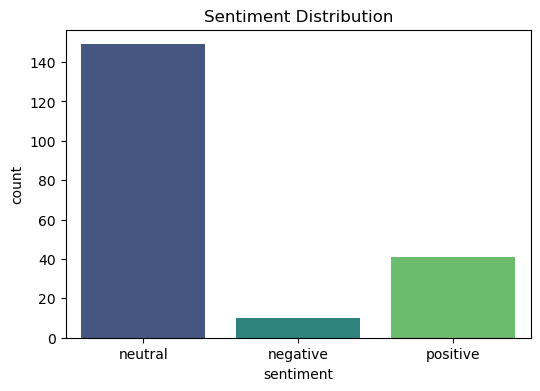

In [16]:
# 4. Exploratory Data Analysis (EDA)
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', data=df, palette='viridis')
plt.title('Sentiment Distribution')
plt.show()

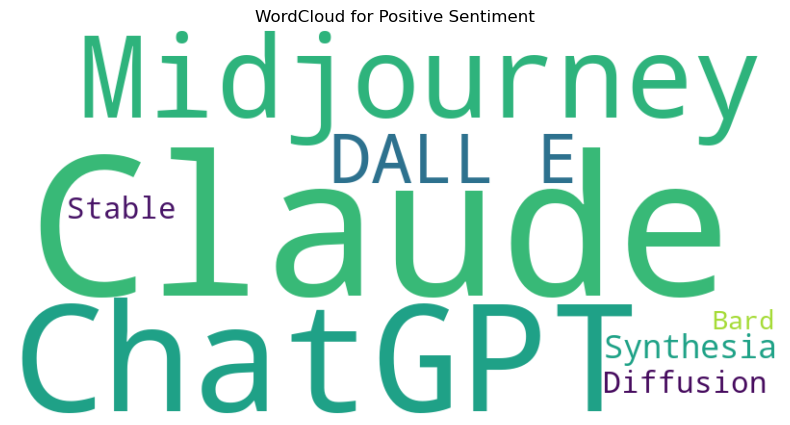

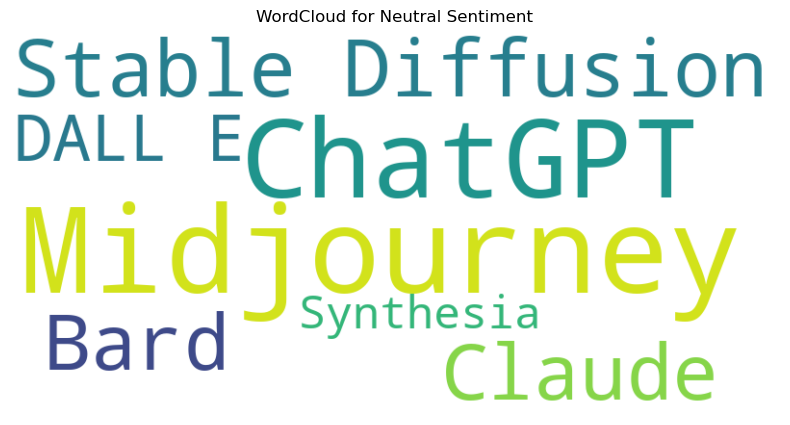

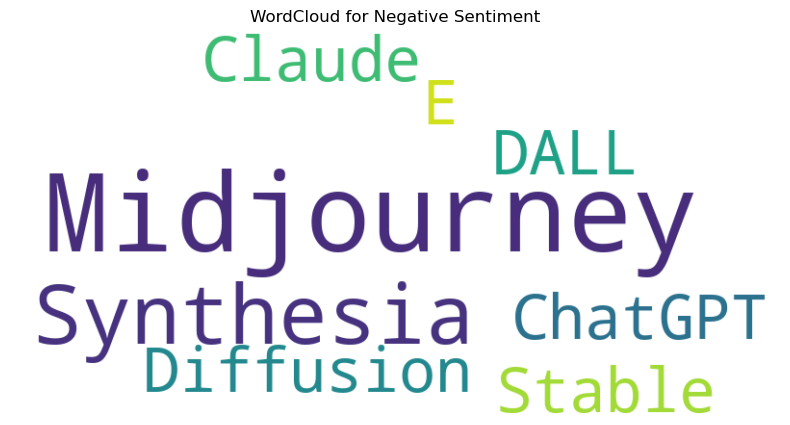

In [17]:
# WordClouds for each sentiment
for sentiment in ['positive', 'neutral', 'negative']:
    text = " ".join(df[df['sentiment'] == sentiment]['Top AI Tools Used'].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud for {sentiment.capitalize()} Sentiment')
    plt.show()


In [18]:
# 5. Text Preprocessing
# We'll use 'Top AI Tools Used' + 'Industry' as text features
df['text_data'] = df['Top AI Tools Used'].astype(str) + " " + df['Industry'].astype(str)

In [19]:
# 6. Feature Extraction
vectorizer = TfidfVectorizer(max_features=300)
X = vectorizer.fit_transform(df['text_data']).toarray()
y = df['sentiment']

In [20]:
# 7. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# 8. Model Training
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)


Classification Report:


C:\Users\91892\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91892\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91892\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         4
     neutral       0.75      1.00      0.86        30
    positive       0.00      0.00      0.00         6

    accuracy                           0.75        40
   macro avg       0.25      0.33      0.29        40
weighted avg       0.56      0.75      0.64        40


Confusion Matrix:


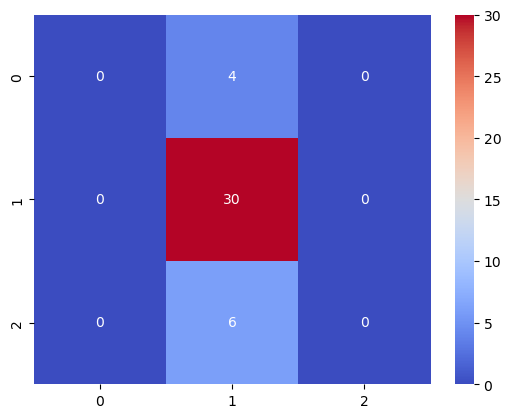


Accuracy Score: 0.7500


In [22]:
# 9. Model Evaluation
y_pred = model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm')
plt.show()

print(f"\nAccuracy Score: {accuracy_score(y_test, y_pred):.4f}")